In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

explain EDA and where the data came from: https://www.kaggle.com/usdot/flight-delays 

Goal is to classify the delay reason. 

In [3]:
df_flights = pd.read_csv('datasets/flights.csv')
df_flights.shape

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5819079, 31)

In [4]:
df_flights.head(30)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From a quick glance, it appears the columns CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY have a good amount of missing values. 

In [5]:
#Get an idea of the percentage of missing values for each column
df_flights.isna().sum().sort_values(ascending=False)/df_flights.shape[0]

CANCELLATION_REASON    0.984554
WEATHER_DELAY          0.817250
AIRLINE_DELAY          0.817250
SECURITY_DELAY         0.817250
AIR_SYSTEM_DELAY       0.817250
LATE_AIRCRAFT_DELAY    0.817250
ARRIVAL_DELAY          0.018056
AIR_TIME               0.018056
ELAPSED_TIME           0.018056
ARRIVAL_TIME           0.015898
TAXI_IN                0.015898
WHEELS_ON              0.015898
WHEELS_OFF             0.015303
TAXI_OUT               0.015303
DEPARTURE_DELAY        0.014805
DEPARTURE_TIME         0.014805
TAIL_NUMBER            0.002530
SCHEDULED_TIME         0.000001
CANCELLED              0.000000
DIVERTED               0.000000
DISTANCE               0.000000
SCHEDULED_ARRIVAL      0.000000
SCHEDULED_DEPARTURE    0.000000
DESTINATION_AIRPORT    0.000000
ORIGIN_AIRPORT         0.000000
FLIGHT_NUMBER          0.000000
AIRLINE                0.000000
DAY_OF_WEEK            0.000000
DAY                    0.000000
MONTH                  0.000000
YEAR                   0.000000
dtype: f

This is expected given the "COLUMNS" only hold a value if a flight was delayed. As per previous studies, around 19.37% of flights are delayed[1] which corroborates the percentage of missing data. 
https://money.com/top-airlines-minimum-delays-holidays/

In [6]:
df_flights['DELAY_REASON'] = df_flights.loc[:,['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1)
df_flights['DELAY_TIME'] = df_flights.loc[:,['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)

In [7]:
# drop cancellation and delay time
df_flights.drop(['CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],axis=1,inplace=True)
df_flights.dropna(subset=['DELAY_REASON'], inplace=True)

In [8]:
# Create a date column
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR','MONTH','DAY']])
df_flights.drop(['YEAR','MONTH','DAY'], axis=1, inplace=True)

In [9]:
# Some airports have an airport code in different format. Convert all the airports to the same format.
df_flights[(df_flights['ORIGIN_AIRPORT'].str.len() > 3) | (df_flights['DESTINATION_AIRPORT'].str.len() > 3)]

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,DELAY_REASON,DELAY_TIME,DATE
4385723,4,AA,1965,N544UW,12892,11057,40,131.0,51.0,16.0,...,2125,858.0,15.0,829,913.0,44.0,0,AIRLINE_DELAY,44.0,2015-10-01
4385733,4,DL,2324,N320US,14869,10397,55,120.0,25.0,17.0,...,1590,639.0,6.0,620,645.0,25.0,0,AIRLINE_DELAY,25.0,2015-10-01
4385741,4,NK,520,N519NK,12889,13198,110,321.0,131.0,11.0,...,1139,746.0,8.0,548,754.0,126.0,0,AIRLINE_DELAY,126.0,2015-10-01
4385761,4,AA,1044,N014AA,12266,13303,500,508.0,8.0,28.0,...,964,848.0,9.0,823,857.0,34.0,0,AIR_SYSTEM_DELAY,34.0,2015-10-01
4385772,4,AS,695,N477AS,11884,14747,500,636.0,96.0,9.0,...,224,726.0,7.0,558,733.0,95.0,0,AIRLINE_DELAY,95.0,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871851,6,AS,121,N763AS,14747,10299,2355,2357.0,2.0,11.0,...,1448,224.0,6.0,134,230.0,56.0,0,AIR_SYSTEM_DELAY,56.0,2015-10-31
4871853,6,AS,927,N508AS,12892,14747,2355,2346.0,-9.0,26.0,...,954,232.0,4.0,138,236.0,58.0,0,AIR_SYSTEM_DELAY,58.0,2015-10-31
4871856,6,UA,1796,N546UA,14771,11618,2355,102.0,67.0,16.0,...,2565,844.0,8.0,715,852.0,97.0,0,AIRLINE_DELAY,97.0,2015-10-31
4871857,6,NK,654,N606NK,14057,13930,2356,39.0,43.0,9.0,...,1739,453.0,8.0,445,501.0,16.0,0,AIR_SYSTEM_DELAY,16.0,2015-10-31


In [10]:
IATA_code = pd.read_csv('datasets/3_digits.csv')
FAA_code = pd.read_csv('datasets/5_digits.csv')

# Convert the data types to strings for merging purposes
IATA_code = IATA_code.astype(str)
FAA_code = FAA_code.astype(str)
df_flights['ORIGIN_AIRPORT'] = df_flights['ORIGIN_AIRPORT'].astype(str)
df_flights['DESTINATION_AIRPORT'] = df_flights['DESTINATION_AIRPORT'].astype(str)

In [11]:
airport_codes = IATA_code.merge(FAA_code, on='Description', how='inner').loc[:,['Code_x','Code_y']]
airport_codes.columns = ['code3', 'code5']

In [12]:
#Similar airport codes have multiple description. This results in the same code being present more than once. As we are matching FAA codes, dropping duplicates
airport_codes = airport_codes.drop_duplicates('code5')

In [13]:
# Fix origin airport names
df_flights = df_flights.merge(airport_codes, left_on='ORIGIN_AIRPORT', right_on='code5', how='left')
df_flights.code3.fillna(df_flights.ORIGIN_AIRPORT, inplace=True)
df_flights.rename(columns={'code3':'ORIGIN_IATA'}, inplace=True)
df_flights.drop(['ORIGIN_AIRPORT','code5'],axis=1, inplace=True)

# Fix destination airport names
df_flights = df_flights.merge(airport_codes, left_on='DESTINATION_AIRPORT', right_on='code5', how='left')
df_flights.code3.fillna(df_flights.DESTINATION_AIRPORT, inplace=True)
df_flights.rename(columns={'code3':'DESTINATION_IATA'}, inplace=True)
df_flights.drop(['DESTINATION_AIRPORT','code5'],axis=1, inplace=True)

In [14]:
# To catch if a route, with no regards to the airline, is dislayed, create a route feature
df_flights['ROUTE'] = list(zip(df_flights.ORIGIN_IATA, df_flights.DESTINATION_IATA))
df_flights.drop(['FLIGHT_NUMBER','TAIL_NUMBER'],axis=1, inplace=True)

In [15]:
# Drop columns with missing departure, duration or arrival
df_flights = df_flights.dropna(how='any')

In [16]:
# Datetime are currently in float64 format. Change them to time format
def fix_time(time_col):
    if time_col == 2400:
        time_col = 0
        
    int_time = "{0:04d}".format(int(time_col))
    return datetime.time(int(int_time[0:2]), int(int_time[2:4]))

In [17]:
df_flights['SCHEDULED_DEPARTURE'] = df_flights['SCHEDULED_DEPARTURE'].apply(fix_time) 
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(fix_time) 
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(fix_time) 
df_flights['WHEELS_OFF'] = df_flights['WHEELS_OFF'].apply(fix_time) 
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(fix_time) 
df_flights['WHEELS_ON'] = df_flights['WHEELS_ON'].apply(fix_time) 

# Merge additional airport information

In [18]:
airports = pd.read_csv('datasets/airports.csv')

In [19]:
# Origin city and state
df_flights = df_flights.merge(airports[['IATA_CODE','CITY','STATE']], left_on='ORIGIN_IATA', right_on='IATA_CODE', how='left')
df_flights = df_flights.rename(columns={'CITY':'ORIGIN_CITY','STATE':'ORIGIN_STATE'})

# Destination city and state
df_flights = df_flights.merge(airports[['IATA_CODE','CITY','STATE']], left_on='DESTINATION_IATA', right_on='IATA_CODE', how='left')
df_flights = df_flights.rename(columns={'CITY':'DESTINATION_CITY','STATE':'DESTINATION_STATE'})

#drop duplicate information
df_flights.drop(['IATA_CODE_x','IATA_CODE_y'], axis=1, inplace=True)

In [20]:
# verify for any missingness after merging the new data
df_flights.isna().sum().sort_values(ascending=False)/df_flights.shape[0]

DESTINATION_STATE      0.000018
DESTINATION_CITY       0.000018
ORIGIN_STATE           0.000016
ORIGIN_CITY            0.000016
WHEELS_ON              0.000000
AIRLINE                0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.000000
DEPARTURE_DELAY        0.000000
TAXI_OUT               0.000000
WHEELS_OFF             0.000000
SCHEDULED_TIME         0.000000
ELAPSED_TIME           0.000000
AIR_TIME               0.000000
DISTANCE               0.000000
SCHEDULED_ARRIVAL      0.000000
TAXI_IN                0.000000
ARRIVAL_TIME           0.000000
ARRIVAL_DELAY          0.000000
DIVERTED               0.000000
DELAY_REASON           0.000000
DELAY_TIME             0.000000
DATE                   0.000000
ORIGIN_IATA            0.000000
DESTINATION_IATA       0.000000
ROUTE                  0.000000
DAY_OF_WEEK            0.000000
dtype: float64

In [21]:
# IATA codes of missing origin city and state
df_flights[df_flights['ORIGIN_CITY'].isna()].ORIGIN_IATA.unique()

array(['NYL'], dtype=object)

In [22]:
# IATA codes of missing origin city and state
df_flights[df_flights['DESTINATION_CITY'].isna()].DESTINATION_IATA.unique()

array(['NYL'], dtype=object)

In [23]:
#NYL is in Yuma Arizon
df_flights.loc[:, ['ORIGIN_CITY', 'DESTINATION_CITY']] = df_flights.loc[:, ['ORIGIN_CITY', 'DESTINATION_CITY']].fillna('Yuma')
df_flights.loc[:, ['DESTINATION_STATE', 'ORIGIN_STATE']] = df_flights.loc[:, ['DESTINATION_STATE', 'ORIGIN_STATE']].fillna('AZ')

In [24]:
# Cleaned data
df_flights

,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,DELAY_REASON,DELAY_TIME,DATE,ORIGIN_IATA,DESTINATION_IATA,ROUTE,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE
0,4,NK,01:15:00,01:27:00,12.0,14.0,01:41:00,207.0,220.0,166.0,...,AIR_SYSTEM_DELAY,25.0,2015-01-01,MSP,FLL,"(MSP, FLL)",Minneapolis,MN,Ft. Lauderdale,FL
1,4,NK,01:25:00,02:37:00,72.0,9.0,02:46:00,204.0,175.0,156.0,...,AIR_SYSTEM_DELAY,43.0,2015-01-01,PHX,ORD,"(PHX, ORD)",Phoenix,AZ,Chicago,IL
2,4,HA,01:45:00,01:45:00,0.0,16.0,02:01:00,370.0,385.0,361.0,...,AIRLINE_DELAY,15.0,2015-01-01,LAS,HNL,"(LAS, HNL)",Las Vegas,NV,Honolulu,HI
3,4,B6,03:07:00,03:04:00,-3.0,25.0,03:29:00,173.0,196.0,160.0,...,AIR_SYSTEM_DELAY,20.0,2015-01-01,BQN,MCO,"(BQN, MCO)",Aguadilla,PR,Orlando,FL
4,4,B6,04:00:00,05:35:00,95.0,9.0,05:44:00,185.0,175.0,163.0,...,AIRLINE_DELAY,85.0,2015-01-01,SJU,MCO,"(SJU, MCO)",San Juan,PR,Orlando,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063434,4,B6,23:42:00,00:03:00,21.0,10.0,00:13:00,163.0,162.0,145.0,...,AIRLINE_DELAY,20.0,2015-12-31,MCO,BQN,"(MCO, BQN)",Orlando,FL,Aguadilla,PR
1063435,4,AS,23:55:00,00:11:00,16.0,10.0,00:21:00,192.0,204.0,189.0,...,AIRLINE_DELAY,28.0,2015-12-31,SEA,MSP,"(SEA, MSP)",Seattle,WA,Minneapolis,MN
1063436,4,NK,23:58:00,00:11:00,13.0,15.0,00:26:00,140.0,155.0,121.0,...,AIR_SYSTEM_DELAY,28.0,2015-12-31,FLL,BQN,"(FLL, BQN)",Ft. Lauderdale,FL,Aguadilla,PR
1063437,4,B6,23:59:00,02:38:00,159.0,34.0,03:12:00,282.0,282.0,243.0,...,AIRLINE_DELAY,159.0,2015-12-31,LAS,JFK,"(LAS, JFK)",Las Vegas,NV,New York,NY


In [25]:
# save processeced file
df_flights.to_csv('datasets/processed_flights.csv')

# EDA

In [26]:
# Change Airlines by their actual name for EDA

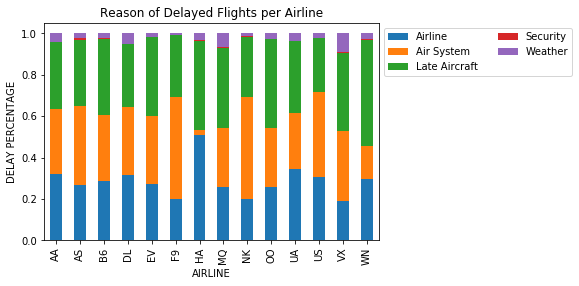

In [27]:
airline_delay = df_flights.groupby(['AIRLINE','DELAY_REASON'])['DELAY_REASON'].agg(DELAY_COUNT='count')
flights_per_airline = df_flights.loc[:,['AIRLINE','DELAY_REASON']].groupby(['AIRLINE']).count()
airline_delay.div(flights_per_airline.DELAY_REASON,axis='index',level='AIRLINE').unstack().plot(kind='bar',stacked=True)
plt.legend(['Airline', 'Air System', 'Late Aircraft', 'Security', 'Weather'], ncol=2, bbox_to_anchor=(1, 1.0))
plt.ylabel('DELAY PERCENTAGE')
plt.title('Reason of Delayed Flights per Airline')
plt.show()

In [28]:
route_delay = df_flights.groupby(['ROUTE','DELAY_REASON'])['DELAY_REASON'].agg(DELAY_COUNT='count')
flights_per_route = df_flights.loc[:,['ROUTE','DELAY_REASON']].groupby(['ROUTE']).count()
flights_per_route.reset_index().sort_values('DELAY_REASON', ascending=False)
route_delay

DELAY_COUNT
ROUTE      DELAY_REASON                    
(ABE, ATL) AIRLINE_DELAY                 37
           AIR_SYSTEM_DELAY              51
           LATE_AIRCRAFT_DELAY           59
           WEATHER_DELAY                  3
(ABE, DTW) AIRLINE_DELAY                 32
...                                     ...
(YUM, PHX) AIRLINE_DELAY                 31
           AIR_SYSTEM_DELAY              66
           LATE_AIRCRAFT_DELAY           99
           SECURITY_DELAY                 1
           WEATHER_DELAY                  3

[17733 rows x 1 columns]

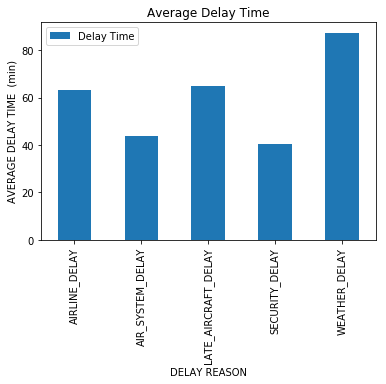

In [29]:
# Verify if routes or airports also show relation with delay
delay_time = df_flights.loc[:,['DELAY_TIME','DELAY_REASON']].groupby(['DELAY_REASON']).mean().plot(kind='bar',stacked=True)
plt.legend(['Delay Time'], ncol=2, loc='upper left')
plt.ylabel('AVERAGE DELAY TIME  (min)')
plt.xlabel('DELAY REASON')
plt.title('Average Delay Time')
plt.show()

In [58]:
dest_delay = df_flights.groupby(['DESTINATION_STATE','DELAY_REASON'])['DELAY_REASON'].agg(DELAY_COUNT='count')
dd = dest_delay.groupby(level=0).transform(lambda x: x == x.max())
dd

DELAY_COUNT
DESTINATION_STATE DELAY_REASON                    
AK                AIRLINE_DELAY              False
                  AIR_SYSTEM_DELAY           False
                  LATE_AIRCRAFT_DELAY         True
                  SECURITY_DELAY             False
                  WEATHER_DELAY              False
...                                            ...
WY                AIRLINE_DELAY               True
                  AIR_SYSTEM_DELAY           False
                  LATE_AIRCRAFT_DELAY        False
                  SECURITY_DELAY             False
                  WEATHER_DELAY              False

[260 rows x 1 columns]

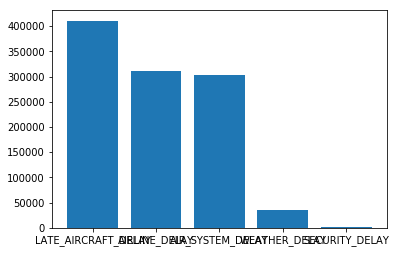

In [74]:
reason_count = df_flights['DELAY_REASON'].value_counts()
plt.bar(reason_count.index, reason_count.values)
plt.show()

# Fit Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = df_flights.DELAY_REASON
X = df_flights.drop('DELAY_REASON',axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
np.sum(scores)/5